Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np


Reading the Continents.csv file

In [2]:
cont = pd.read_csv('continents.csv', delimiter = ',').drop('region',axis=1)
cont

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


Reading the Income per person file and melting the wide to long table

In [3]:
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv', index_col = 0)

income.columns = income.columns.astype(int)
income.reset_index(inplace = True)
income = income.melt(id_vars = 'country',var_name = 'year',value_name = 'income')
income

,country,year,income
0,Afghanistan,1800,674
1,Angola,1800,691
2,Albania,1800,746
3,Andorra,1800,1340
4,United Arab Emirates,1800,1120
...,...,...,...
48940,Samoa,2050,9950
48941,Yemen,2050,4810
48942,South Africa,2050,17.6k
48943,Zambia,2050,4270


Converting the 'k' letter to 1000 value

In [4]:
def convert_k_to_number(row):
    
    rowt = str(row)
    tmp = rowt.split('k')
    if len(tmp) > 1:
        return float(tmp[0])*1000.0
    else:
        return float(tmp[0])

In [5]:
res = []
for val in income['income']:
    
    res.append(convert_k_to_number(val))

income['income'] = res
income

,country,year,income
0,Afghanistan,1800,674.0
1,Angola,1800,691.0
2,Albania,1800,746.0
3,Andorra,1800,1340.0
4,United Arab Emirates,1800,1120.0
...,...,...,...
48940,Samoa,2050,9950.0
48941,Yemen,2050,4810.0
48942,South Africa,2050,17600.0
48943,Zambia,2050,4270.0


Reading the Life expectancy file

In [6]:
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
life

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69


Reset the index of life expectancy file

In [7]:
life = life.reset_index()  
life

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
257,Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Melting the Table to Long table from Wide table

In [8]:
life = life.melt(id_vars='country',          
                 var_name='year', 
                 value_name='life_expectancy'
                )                                    #using melt fnctn to convert wide into long
life.dropna(inplace = True)
life

,country,year,life_expectancy
1,Afghanistan,1800,28.21
3,Albania,1800,35.40
4,Algeria,1800,28.82
7,Angola,1800,26.98
9,Antigua and Barbuda,1800,33.54
...,...,...,...
56411,Virgin Islands (U.S.),2016,80.82
56414,Yemen,2016,64.92
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69


Reading the Population file

In [9]:
df_pop = pd.read_excel('gapminder_population.xlsx', index_col=0)
df_pop

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Northern Marianas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Georgia and the South Sandwich Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [11]:
df_pop.index.name = 'country' 

In [12]:
df_pop = df_pop.reset_index()
df_pop

,country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Northern Marianas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,South Georgia and the South Sandwich Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,US Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_pop = df_pop.melt(id_vars='country',          
                 var_name='year', 
                 value_name='total_population'
                )                                    #using melt fnctn to convert into long
df_pop.dropna(inplace = True)
df_pop.reset_index(drop = True)

,country,year,total_population
0,Afghanistan,1800,3280000.0
1,Albania,1800,410445.0
2,Algeria,1800,2503218.0
3,American Samoa,1800,8170.0
4,Andorra,1800,2654.0
...,...,...,...
20171,Zambia,2015,16211767.0
20172,Zimbabwe,2015,15602751.0
20173,South Sudan,2015,12339812.0
20174,Curaçao,2015,157203.0


Merging the Income table with the Population Table

In [14]:
pop_income = pd.merge(left = df_pop, right = income, how = 'left', on = ['country', 'year'])
pop_income

,country,year,total_population,income
0,Afghanistan,1800,3280000.0,674.0
1,Albania,1800,410445.0,746.0
2,Algeria,1800,2503218.0,788.0
3,American Samoa,1800,8170.0,NaN
4,Andorra,1800,2654.0,1340.0
...,...,...,...,...
20171,Zambia,2015,16211767.0,3440.0
20172,Zimbabwe,2015,15602751.0,2960.0
20173,South Sudan,2015,12339812.0,2140.0
20174,Curaçao,2015,157203.0,NaN


Merging the Life expectancy table with the Population Table

In [15]:
df_combined = pd.merge(left = pop_income, right = life, how = 'left', on = ['country', 'year'])
df_combined

,country,year,total_population,income,life_expectancy
0,Afghanistan,1800,3280000.0,674.0,28.21
1,Albania,1800,410445.0,746.0,35.40
2,Algeria,1800,2503218.0,788.0,28.82
3,American Samoa,1800,8170.0,NaN,NaN
4,Andorra,1800,2654.0,1340.0,NaN
...,...,...,...,...,...
20171,Zambia,2015,16211767.0,3440.0,56.70
20172,Zimbabwe,2015,15602751.0,2960.0,59.30
20173,South Sudan,2015,12339812.0,2140.0,56.10
20174,Curaçao,2015,157203.0,NaN,NaN


### Merging the Continents table with the Population Table ot recognize the Countries in the continents


In [16]:
con = []

for i in range(len(df_combined)):
    
    nx = cont['country'] == np.array(df_combined['country'])[i]
    val = cont['continent'][nx]
    
    if np.sum(nx) == 1:
        con.append(list(val)[0])
    else:
        con.append('Asia')

df_combined['continent'] = con
df_combined.dropna(inplace = True)
df_combined

,country,year,total_population,income,life_expectancy,continent
0,Afghanistan,1800,3280000.0,674.0,28.21,Asia
1,Albania,1800,410445.0,746.0,35.40,Europe
2,Algeria,1800,2503218.0,788.0,28.82,Africa
5,Angola,1800,1567028.0,691.0,26.98,Africa
7,Antigua and Barbuda,1800,37000.0,846.0,33.54,North America
...,...,...,...,...,...,...
20168,Vietnam,2015,93447601.0,6440.0,75.40,Asia
20170,Yemen,2015,26832215.0,3270.0,66.00,Asia
20171,Zambia,2015,16211767.0,3440.0,56.70,Africa
20172,Zimbabwe,2015,15602751.0,2960.0,59.30,Africa


### Plotting Income against Life expectancy of various countries in the years mentioned in the Gap Minder Project

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
year_list = df_combined['year'].unique()

### Seaborn Scatter plot

Tried to set the background to white in SNS scatter plot;
Did not work for some reason

In [19]:
sns.set_style("whitegrid")

Sns Scatterplot for year 2000

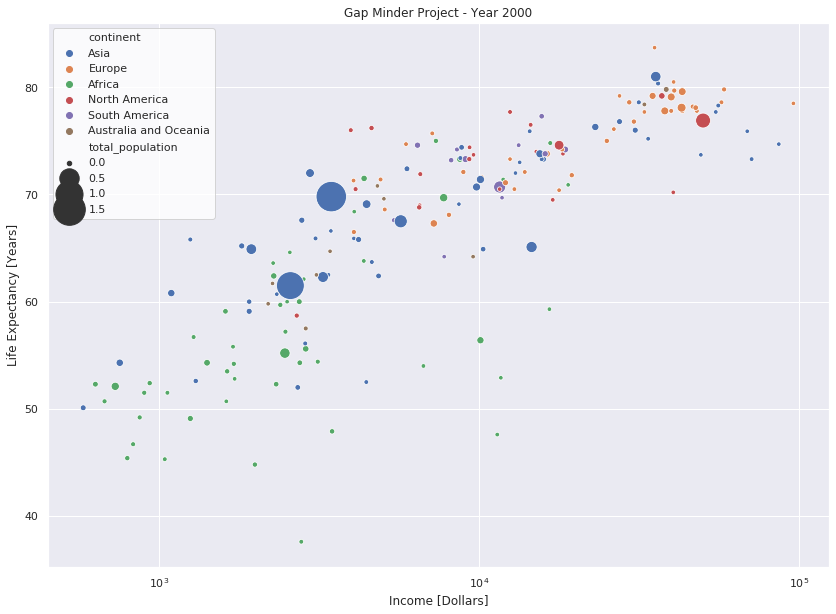

In [24]:
df_combined_subset = df_combined.loc[df_combined['year'] == 2000]
hue_val = df_combined['continent']
bubble_val = df_combined['total_population']
sns.set_style("whitegrid")
sns.set(font_scale = 1)

fig , pt = plt.subplots(figsize = (14, 10));

sns.set_style("whitegrid")
sns.scatterplot(x='income', y='life_expectancy', size = bubble_val,  hue = hue_val, data=df_combined_subset, alpha= 1, sizes=(20, 1000));

pt.set_xscale('log')
plt.xlabel('Income [Dollars]');
plt.ylabel('Life Expectancy [Years]');
plt.title('Gap Minder Project' + ' - ' + 'Year' + ' ' + '2000');



### Scatter plot for the range of Years saved into a folder

In [21]:
for i in range(len(year_list)):
    df_combined_subset = df_combined.loc[df_combined['year'] == year_list[i]]
    hue_val = df_combined['continent']
    bubble_val = df_combined['total_population']
    sns.set_style("whitegrid")
    sns.set(font_scale = 1.5)
    fig , pt = plt.subplots(figsize = (14, 10));
    sns.set_style("whitegrid")
    sns.scatterplot(x='income', y='life_expectancy', data=df_combined_subset, alpha = 1, hue = hue_val, size = bubble_val, sizes=(20, 1000));
    plt.legend(loc='upper left')
    pt.set_xscale('log')
    plt.xlabel('Income [Dollars]');
    plt.ylabel('Life Expectancy [Years]');
    plt.title('Gap Minder Project' + ' - ' + 'Year' + ' ' + str(year_list[i]));
    plt.savefig('/home/madhur/spiced_projetcs/week01/savedplots/' + str(i).zfill(3) + '.png', dpi = 100)
    plt.close()

### Creating a .GIF file combing the files from the above created plots

In [22]:
import imageio
import os
dirx = '/home/madhur/spiced_projetcs/week01/savedplots/'
filename = np.sort(os.listdir(dirx))
images = []

for i in range(len(filename)):
    #filename = 'lifeexp_{}.png'.format(i)
    images.append(imageio.imread(dirx + filename[i]))

imageio.mimsave('output.gif', images, fps=5)